## Task 3: Exploratory Data Analysis - Retail

* To Perform 'Exploratory Data Analysis' on dataset "SampleSuperstore"
* To detect the weak areas where more work is necessary to make profit.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Preprocessing

In [3]:
#Check the shape
df.shape

(9994, 13)

In [4]:
#check for the missing value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#Checking for duplicates
df.duplicated().sum()

17

In [6]:
#removing duplicates
df = pd.DataFrame.drop_duplicates(df)
df.duplicated().sum()

0

## Checking for Outliers

<AxesSubplot:xlabel='Quantity'>

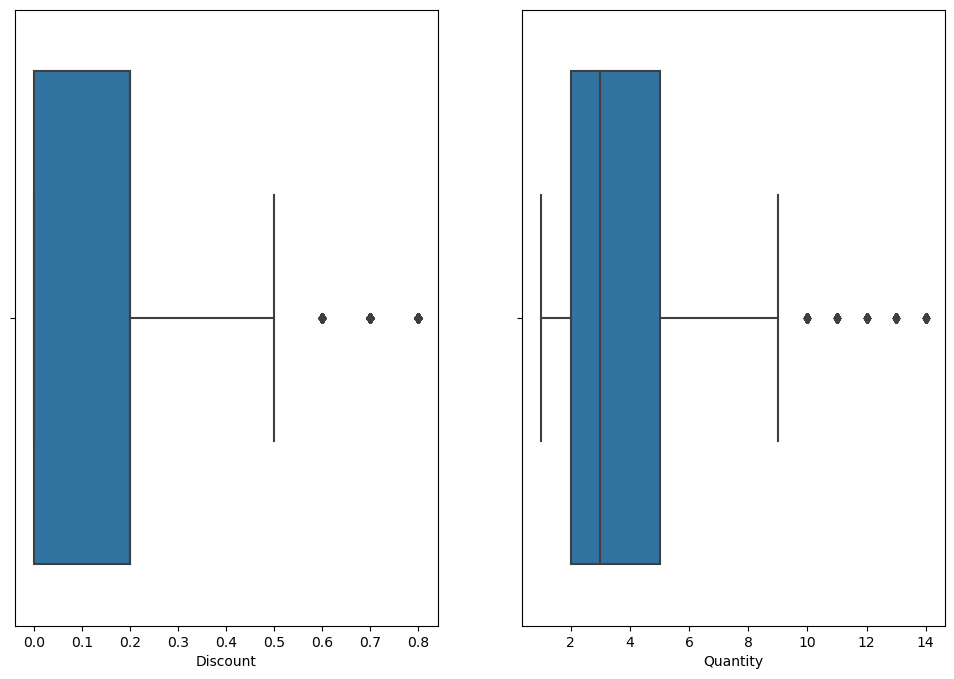

In [7]:
fig, ax= plt.subplots(1, 2, figsize=(12,8))
#sns.boxplot(x=df["Sales"], ax=ax[0])
sns.boxplot(x=df["Discount"], ax=ax[0])
sns.boxplot(x=df["Quantity"], ax=ax[1])

## Removing the Outliers

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

C:\Users\athar\AppData\Local\Temp\ipykernel_2788\1834589067.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [9]:
#new shape
df_new.shape

(7127, 13)

<AxesSubplot:xlabel='Quantity'>

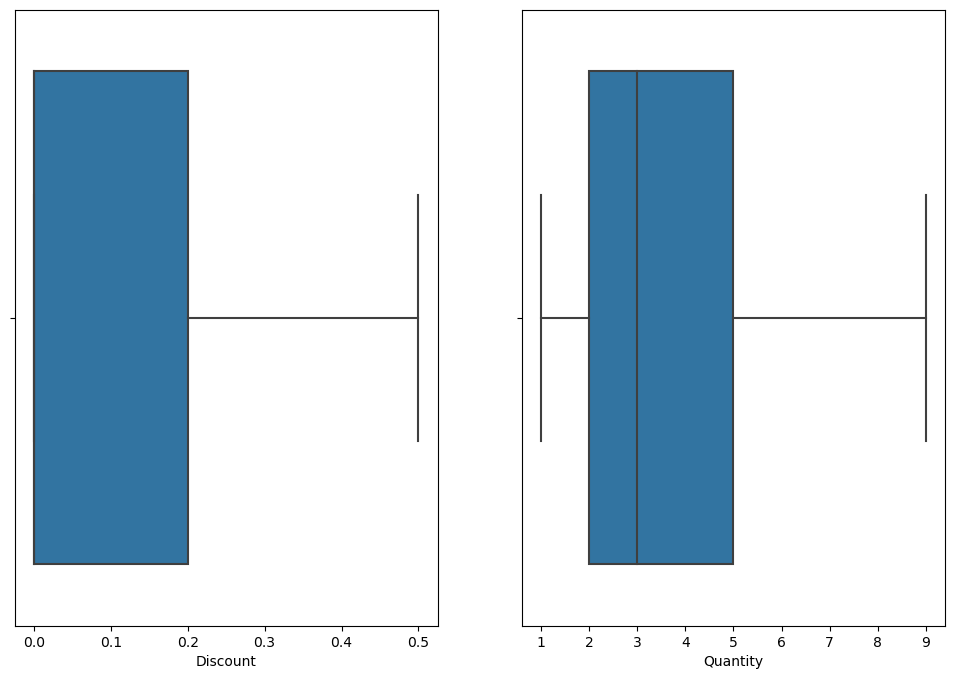

In [10]:
#After removing the Outliers
fig, ax= plt.subplots(1, 2, figsize=(12,8))
sns.boxplot(x=df_new["Discount"], ax=ax[0])
sns.boxplot(x=df_new["Quantity"], ax=ax[1])
#sns.boxplot(x=df_new["Quantity"], ax=ax[2])

In [11]:
# drop the unnecessary columns
df_new.drop(['Postal Code'], axis=1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932


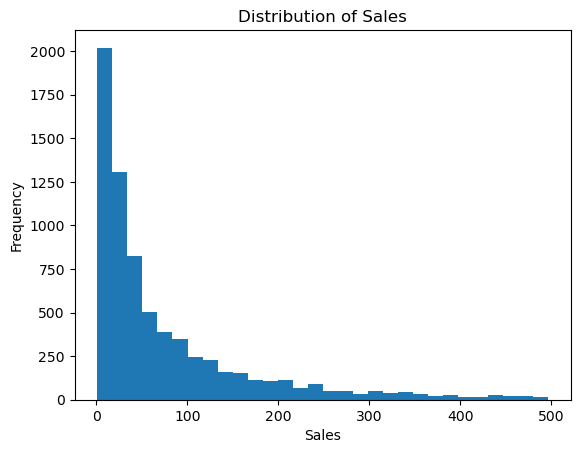

In [12]:
# Visualize the distribution of a numerical column (e.g., Sales)
plt.hist(df_new['Sales'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

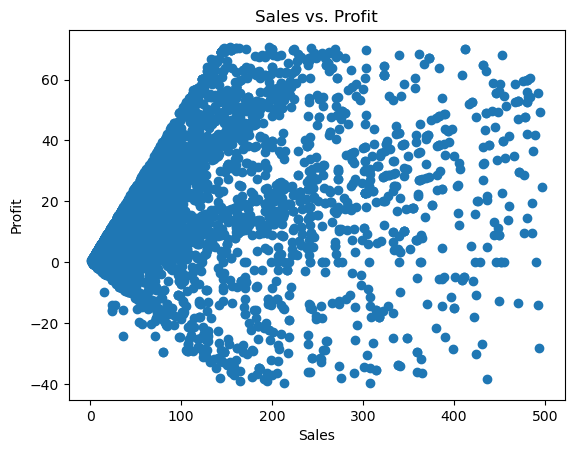

In [13]:
# Create a scatter plot to explore the relationship between two numerical columns (e.g., Sales and Profit)
plt.scatter(df_new['Sales'], df_new['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')
plt.show()

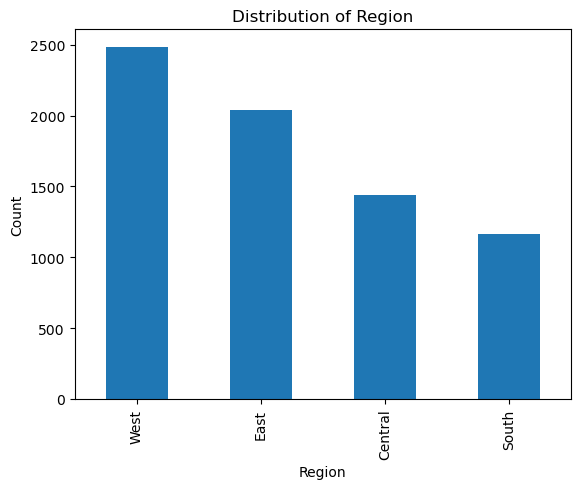

In [14]:
# Plot a bar chart to examine a categorical column (e.g., Region)
df_new['Region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')
plt.show()

In [15]:
# Calculate the correlation matrix to identify relationships between numerical variables
correlation_matrix = df_new.corr()
print(correlation_matrix)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000  0.059606  0.014144  0.069121 -0.005871
Sales           0.059606  1.000000  0.128263  0.137336  0.396678
Quantity        0.014144  0.128263  1.000000 -0.027241  0.229784
Discount        0.069121  0.137336 -0.027241  1.000000 -0.310595
Profit         -0.005871  0.396678  0.229784 -0.310595  1.000000


In [16]:
# Compute the total profit by category (e.g., Category, Sub-Category)
category_profit = df_new.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
print(category_profit)

           Category Sub-Category      Profit
0         Furniture    Bookcases   1043.6763
1         Furniture       Chairs   2388.0958
2         Furniture  Furnishings  10693.4373
3         Furniture       Tables    190.1562
4   Office Supplies   Appliances   6111.5979
5   Office Supplies          Art   5576.4718
6   Office Supplies      Binders  12019.9719
7   Office Supplies    Envelopes   3816.8839
8   Office Supplies    Fasteners    877.4990
9   Office Supplies       Labels   3477.4523
10  Office Supplies        Paper  19400.5435
11  Office Supplies      Storage   5372.2194
12  Office Supplies     Supplies    821.9354
13       Technology  Accessories  11090.7526
14       Technology      Copiers    179.9940
15       Technology     Machines    451.3771
16       Technology       Phones   9197.6142


In [17]:
# Find the top-selling products (e.g., Sub-Category) based on quantity sold
top_products = df_new.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Sub-Category
Paper          4308
Art            2845
Binders        2820
Furnishings    2522
Storage        2053
Accessories    2032
Phones         1774
Labels         1261
Appliances      981
Chairs          921
Name: Quantity, dtype: int64


* To gain insights into the sales and profit/loss by category and region, we can create bar charts.

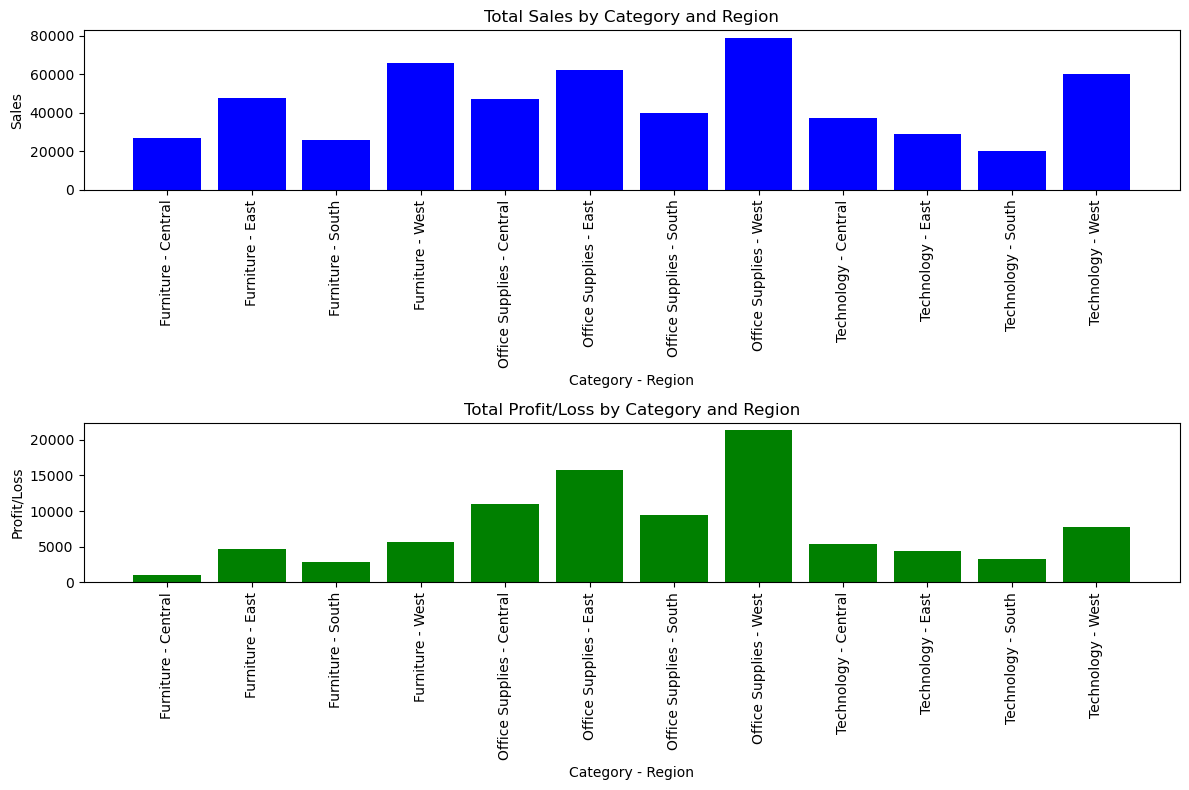

In [18]:
# Calculate total sales and profit/loss by category and region
category_region_data = df_new.groupby(['Category', 'Region']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort the data by category and region
category_region_data = category_region_data.sort_values(['Category', 'Region'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart for sales
plt.subplot(2, 1, 1)
plt.bar(category_region_data.index, category_region_data['Sales'], color='blue')
plt.xlabel('Category - Region')
plt.ylabel('Sales')
plt.title('Total Sales by Category and Region')
plt.xticks(category_region_data.index, category_region_data['Category'] + ' - ' + category_region_data['Region'], rotation=90)

# Plot the bar chart for profit/loss
plt.subplot(2, 1, 2)
plt.bar(category_region_data.index, category_region_data['Profit'], color='green')
plt.xlabel('Category - Region')
plt.ylabel('Profit/Loss')
plt.title('Total Profit/Loss by Category and Region')
plt.xticks(category_region_data.index, category_region_data['Category'] + ' - ' + category_region_data['Region'], rotation=90)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Visualizing Profit/Loss over all the Products Subcategorically

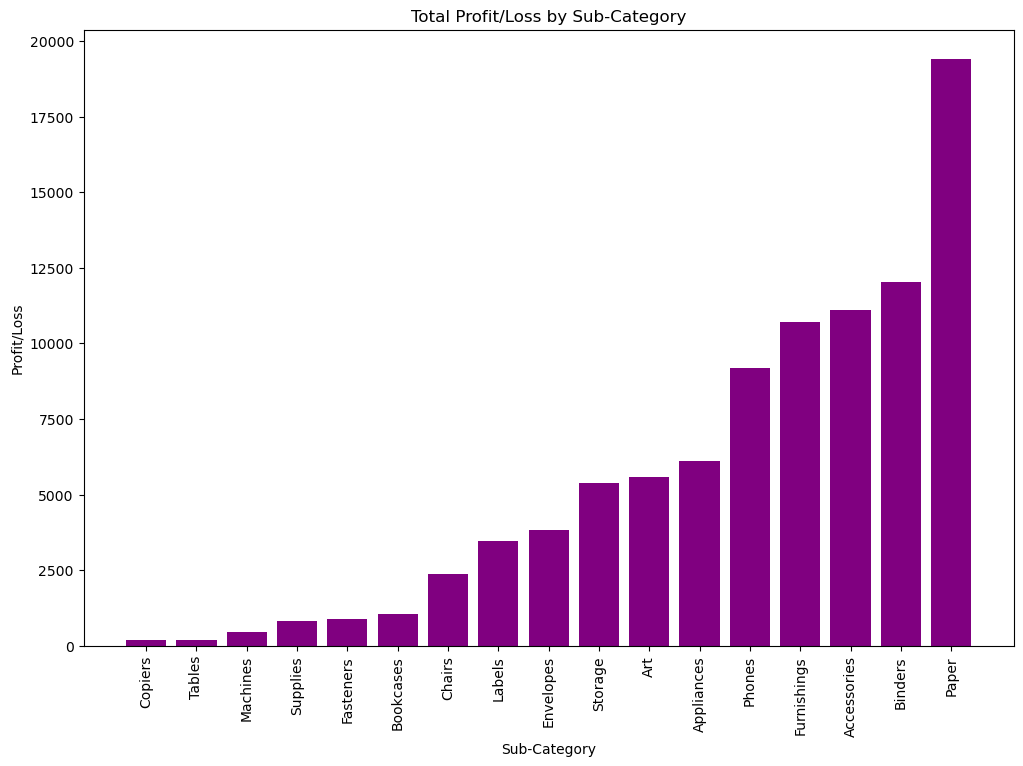

In [19]:
# Calculate total profit/loss by sub-category
subcat_profit_data = df_new.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort the data by profit/loss
subcat_profit_data = subcat_profit_data.sort_values('Profit')

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart
plt.bar(subcat_profit_data['Sub-Category'], subcat_profit_data['Profit'], color='purple')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss')
plt.title('Total Profit/Loss by Sub-Category')
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Sales and Profit insight for each Shipping Category

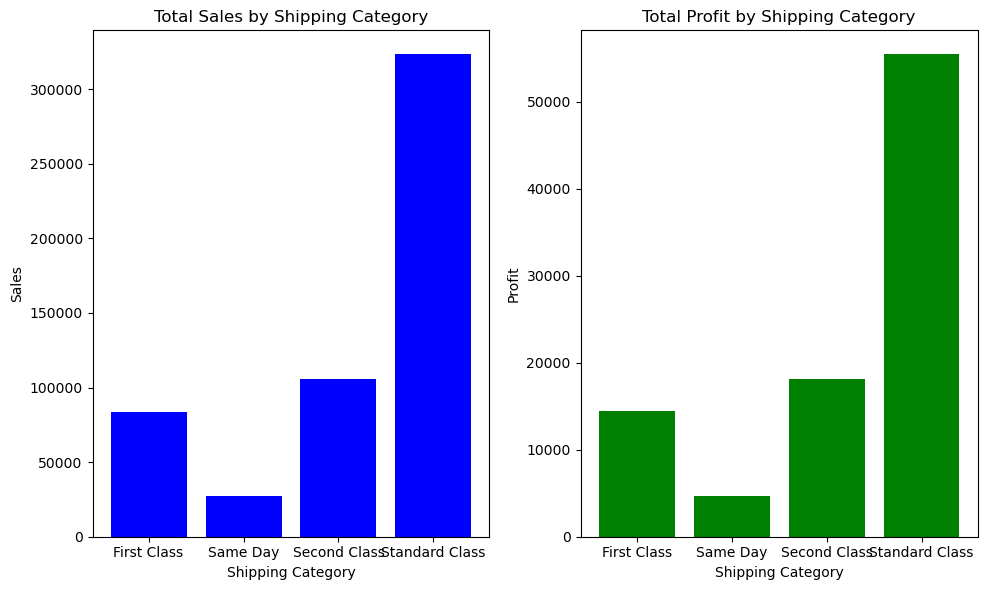

In [20]:
# Calculate total sales and profit by shipping category
shipping_data = df_new.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart for sales
plt.subplot(1, 2, 1)
plt.bar(shipping_data['Ship Mode'], shipping_data['Sales'], color='blue')
plt.xlabel('Shipping Category')
plt.ylabel('Sales')
plt.title('Total Sales by Shipping Category')

# Plot the bar chart for profit
plt.subplot(1, 2, 2)
plt.bar(shipping_data['Ship Mode'], shipping_data['Profit'], color='green')
plt.xlabel('Shipping Category')
plt.ylabel('Profit')
plt.title('Total Profit by Shipping Category')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Profit Margin by Product Category

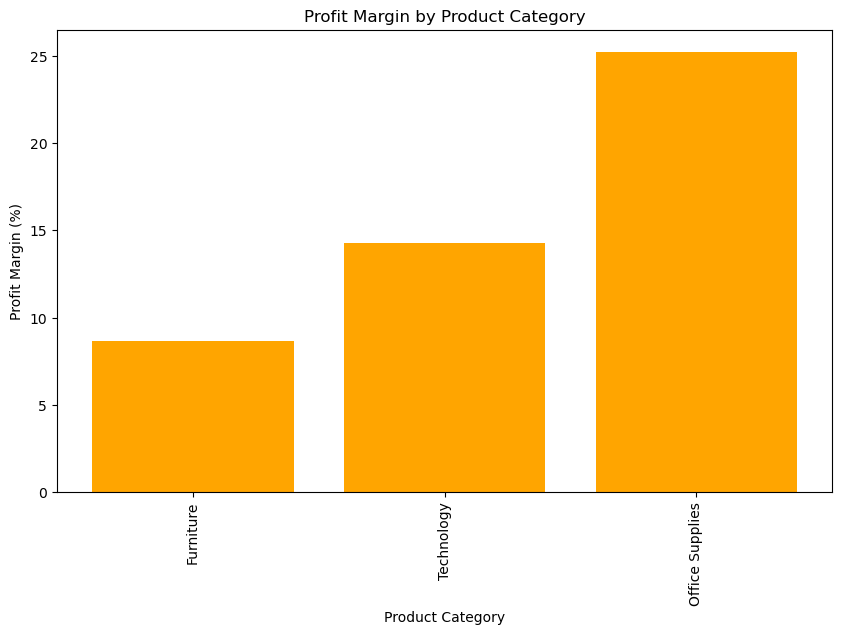

In [21]:
# Calculate profit margin by product category
category_profit_margin = df_new.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).reset_index(name='Profit Margin')

# Sort the data by profit margin
category_profit_margin = category_profit_margin.sort_values('Profit Margin')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart for profit margin
plt.bar(category_profit_margin['Category'], category_profit_margin['Profit Margin'], color='orange')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Product Category')
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Regional Analysis

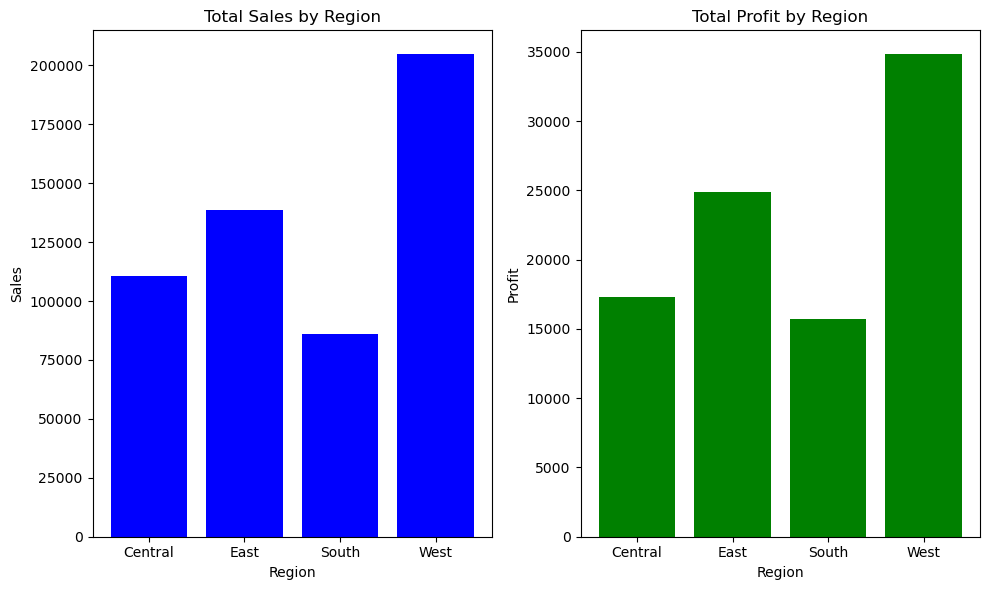

In [22]:
# Calculate total sales and profit by region
region_data = df_new.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart for sales by region
plt.subplot(1, 2, 1)
plt.bar(region_data['Region'], region_data['Sales'], color='blue')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Total Sales by Region')

# Plot the bar chart for profit by region
plt.subplot(1, 2, 2)
plt.bar(region_data['Region'], region_data['Profit'], color='green')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Total Profit by Region')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Sales by Top 10 City within Each Region

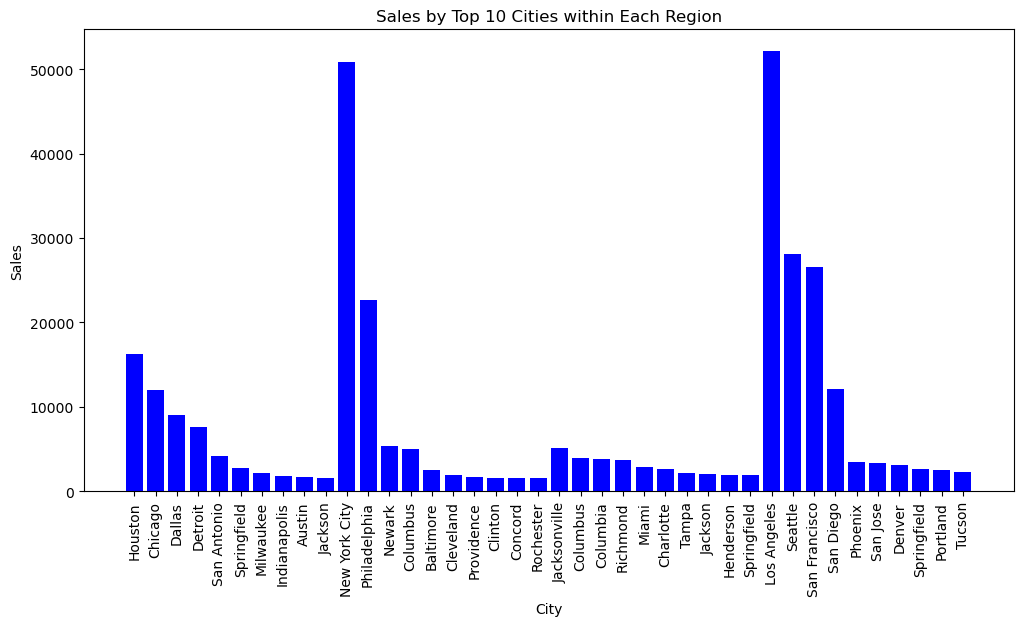

In [23]:
# Calculate total sales by region and city
region_city_sales = df_new.groupby(['Region', 'City']).agg({'Sales': 'sum'}).reset_index()

# Sort the cities within each region based on sales
region_city_sales = region_city_sales.groupby('Region').apply(lambda x: x.nlargest(10, 'Sales')).reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the grouped bar chart for sales by top 10 cities within each region
plt.bar(range(len(region_city_sales)), region_city_sales['Sales'], tick_label=region_city_sales['City'], color='blue')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Sales by Top 10 Cities within Each Region')
plt.xticks(rotation=90)

# Show the plot
plt.show()